# [Practice Seaborn]

*KU LeeDongGyu*

NOTE : <br> 
- Unlike Jupyter Notebook, you can do step-by-step execution in Pycharm.
- Therefore, if you can, run on the Pycharm and figure out what it means.

## 1. Examples
---

In [2]:
pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/53/17/9dfd64540b6645fae581462ed2d1c8e680b7e946ca2789c5149693660392/scipy-1.3.0-cp37-cp37m-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#iris = sns.load_dataset("iris") #붗꽃 데이터
#titanic = sns.load_dataset('titanic') #타이타닉호 데이터
#tips = sns.load_dataset('tips') #팁 데이터
#flights = sns.load_dataset('flights') #여객운송 데이터
#fmri = sns.load_dataset("fmri") #시간별 신호 데이터?


In [5]:
print("Seaborn version : ", sns.__version__) #현재 버전 체크.
sns.set() #초기화.
sns.set_style('whitegrid') #도표의 style을 whitegrid로 줌. 그밖에 darkgrid 등이 있음.

Seaborn version :  0.9.0


### 1. relplot (Scatter plot)

#### 1-1)

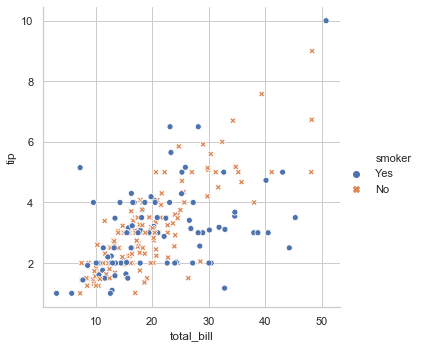

In [7]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)
#hue옵션에 카테고리 변수 이름을 지정(카테고리형 데이터가 섞여있는 경우)
#hue는 빛깔이라는 뜻.
#이에따라 카테고리 값에 따라 색깔을 다르게 지정가능.
#style 옵션을 통해 symbol을 다르게 줄 수 있음. (hue옵션과 더불어 명확히 표현 가능.)
# sns.relplot(x='total_bill',y='tip',data=tips); #과 비교해보면 안다!
# sns.relplot(x='total_bill', y='tip',hue = 'smoker',data=tips); #를 비교해보면 안다!


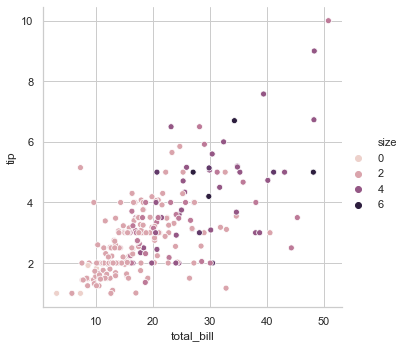

In [8]:
sns.relplot(x='total_bill',y='tip',hue='size',data=tips)
#hue 옵션에는 실수형 데이터도 줄수 있음.

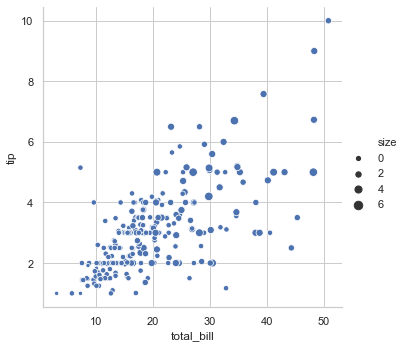

In [9]:
sns.relplot(x='total_bill',y='tip',size='size',data=tips)
#이때 hue옵션이 아닌, size옵션을 주면 크기를 변화시키면서 구별가능
#--> sns.relplot(x='total_bill',y='tip',hue = 'size', size='size',data=tips)

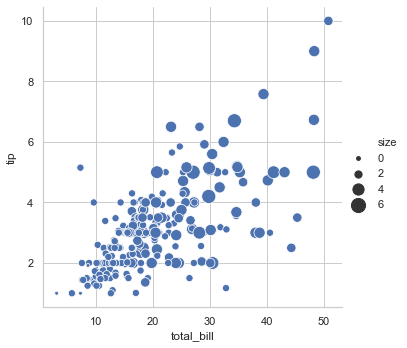

In [10]:
sns.relplot(x='total_bill',y='tip',size='size',sizes=(15,200),data=tips )
#사이즈를 15~200 사이로 균등하게 자를때 쓰는 옵션 - sizes
#결론 : 무리를 구분짓는 옵션 : hue, style, size(sizes) , col (catplot에 나옴)


#### 1-2)

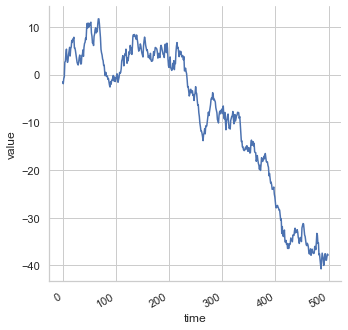

In [11]:
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
#dataframe에는 이렇게 사전이 들어와도 상관없음. 알아서 읽음. 앞에꺼=x축, 뒤에꺼=y축
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate() #크기맞춤// 이런게있다 정도로 참고.


  subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970


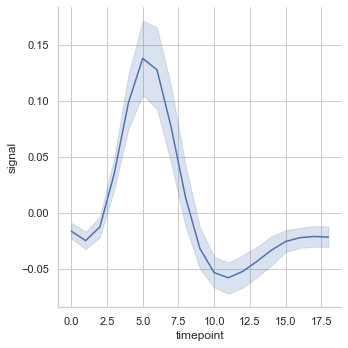

In [14]:
#예3)
#plotting subsets of data with semantic mappings
fmri = sns.load_dataset("fmri")
print(fmri.head())
sns.relplot(x="timepoint",y='signal',kind='line',data=fmri);
#relplot도 kind를 줄 수 있으며, 주로 line으로 줌(bar,box는 안됨.)
#선 형태로 time point에 따른 signal변화 확인가능. 영역은 95%신뢰구간인듯.

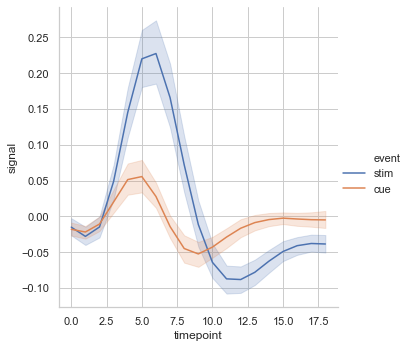

In [15]:
sns.relplot(x="timepoint",y='signal',hue='event',kind='line',data=fmri);
#선형태로 event별 time point에 따른 signal변화 확인 가능.


### 2. catplot (Category plot)

In [60]:
#범주형 플롯 <- 위아래로 길게 데이터들을 분산시켜놓은 플롯. 이에따라 box, bar, line등으로 변질가능.

#### 2-1)

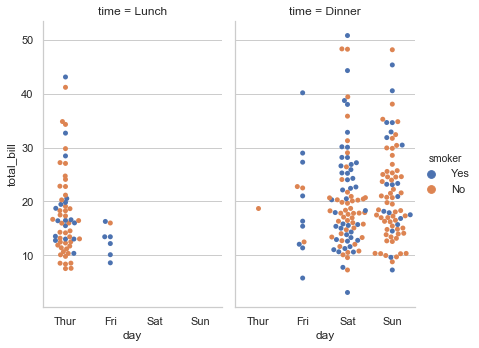

In [16]:
sns.catplot(x="day", y="total_bill", hue="smoker",col="time", aspect=.6, kind="swarm", data=tips)
#col변수는 time별로 그림을 또나눌수있음.
#hue는 구분지을 때 범례를 줄 때 쓰는 옵션. col은 column 기준을 어떻게 줄것인.
#kind 는 swarm은 무리라는 뜻. (데이터들 산포를 퍼지게 주라는 옵션)
#그밖에 kind옵션은 box, bar, line 등이 있음.
#aspect는 너비 , height는 높이를 주는 옵션. (숫자가 클수록 크게보임)

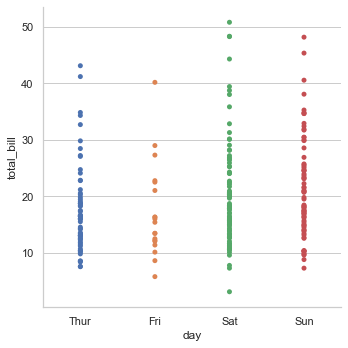

In [17]:
sns.catplot(x='day',y='total_bill',jitter = False,data=tips);
#jitter(안절부절 못하다)가 True면, 데이터들을 흩뿌려 시행하라는 의미.

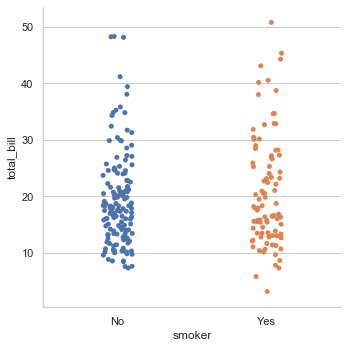

In [18]:
sns.catplot(x='smoker',y='total_bill',order= ['No','Yes'],data=tips);
#순서를 주고싶을때는 이렇게. (원래는 x축이 Yes, NO로 출력됐으나, 오더를 주면 바뀜)


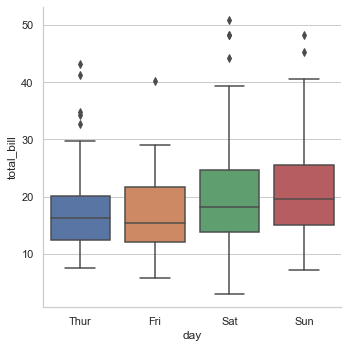

In [19]:
sns.catplot(x='day',y='total_bill',kind='box',data=tips);
#box plot 을 출력하고싶을때 kind옵션을 box


19


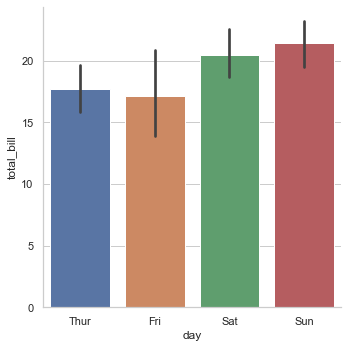

In [21]:
sns.catplot(x='day',y='total_bill',kind='bar',data=tips);
#bar plot 을 출력하고싶을때 kind옵션을 bar. 이떄 bar의 곡대기는 y변수의 평균이고, 위아래의 막대기는 1 표준편차
#bar plot은 도수가 아님! (히스토그램과 다름!!)
print(len(tips.query('day == "Fri"'))) #참고. 길이를 볼때 체크. 데이터의 길이를 출력해준다.


#### 2-2)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


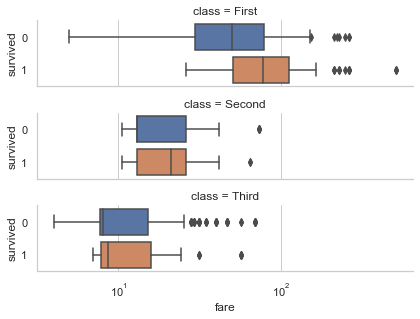

In [24]:
titanic = sns.load_dataset("titanic") #load_dataset 은 데이터불러오기함수.
g = sns.catplot(x="fare", y="survived", row="class", #가로로보고싶을땐 row옵션.
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0 ")) #query를 통해 행속성의 필터링
#orient는 v또는 h를 변수로 가지며, h=수평, v=수직. 플롯내의 각 구역의 그림 표현방법인가봄. 확실하진않음
#범주형을 원하면, data=titanic.query('sex == "female"') 하면 됨.
print(titanic.head())
g.set(xscale="log"); #로그스케일로 set을 바꿔서 표현.


### 3. lmplot & regplot (Regression plot)

In [25]:
# regplot과 달리 lmplot은 hue파라미터로 categorical변수를 지정해서 데이터의 분포와 선형관계를 표시할 수 있음.
# 그러므로, regplot보단 lmplot을 사용하자!! 일단 두 함수에대한 설명은 달아놓는다.
# 주의!!! regplot만 x변수, y변수에 데이터값을 넣고, data라는 옵션이 존재하지 않음!!!! 
# 그외의 나머지에서는 data라는 옵션을 받기에 통일성을 갖춘다. 그래서 lmplot이 더 암기하기쉬움!

#### 3-1)

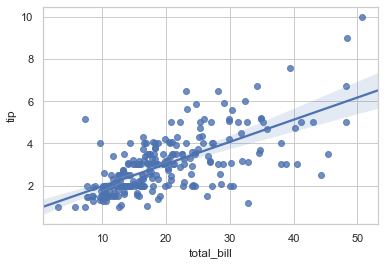

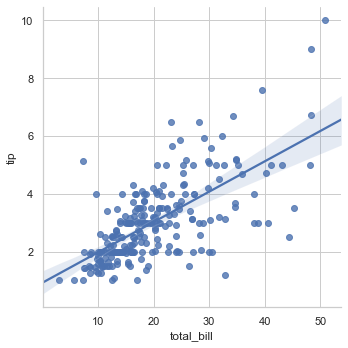

In [34]:
#lmplot과 regplot의 비교
#visualizing linear relationships
tips.head()
sns.regplot(x='total_bill',y='tip',data=tips );
sns.lmplot(x='total_bill',y='tip',data=tips ); #얘를 잘씀. 이유는아래에.

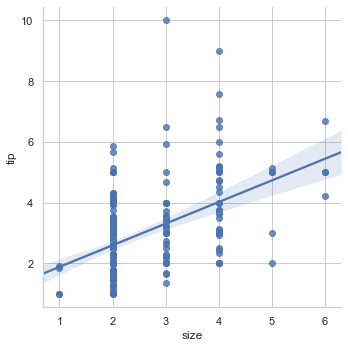

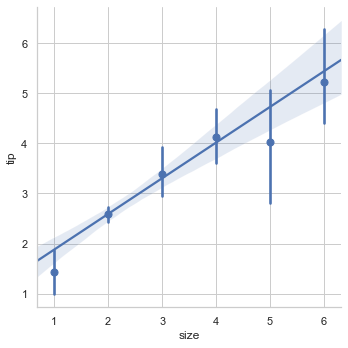

In [31]:
sns.lmplot(x='size',y='tip',data=tips );
sns.lmplot(x='size',y='tip',data=tips,x_estimator=np.mean);
#이런식으로 outlier을 제외하고 깔끔하게 표시할 수 있음. x_estimator는 함수를 집어넣는 변수.


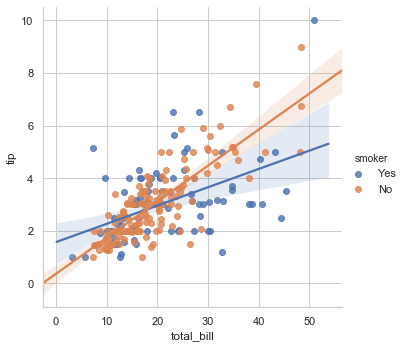

In [32]:
sns.lmplot(x='total_bill',y='tip',hue='smoker',data=tips)
#regplot과 달리 lmplot은 hue파라미터로 categorical변수를 지정해서 데이터의 분포와
#선형관계를 표시할 수 있음.
#위 그래프는 smoker별로 total_bills에 다른 tip관계를 묘사한 그림.

#### 3-2)

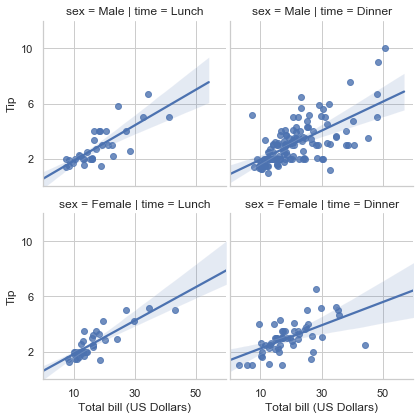

In [35]:
# lmplot
g = sns.lmplot(x="total_bill", y="tip", row="sex", col="time",
               data=tips, height=3)
g = (g.set_axis_labels("Total bill (US Dollars)", "Tip")
     .set(xlim=(0, 60), ylim=(0, 12),
          xticks=[10, 30, 50], yticks=[2, 6, 10])
     .fig.subplots_adjust(wspace=.02))

#g.set(xlim=(0,100),ylim=(0,20),xticks=[10,30,50],yticks=[2,6,10],title="hi",  xlabel = "hello" , ylabel = "hehe")
#다반 이럴 경우 전체에 한꺼번에 적용.

#### 3-3) 

In [62]:
# regplot
df = sns.load_dataset('iris') #seaborn에 내장되어있는 함수.
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


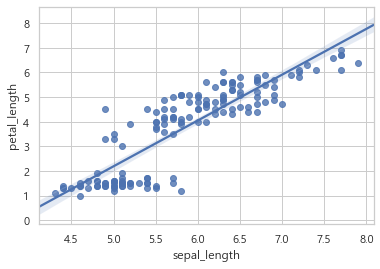

In [63]:
# scatter plot
sns.regplot(x=df["sepal_length"], y=df["petal_length"])
#회귀 직선까지 같이 그려주고, 직선의 신뢰구간도 보여주는 plot

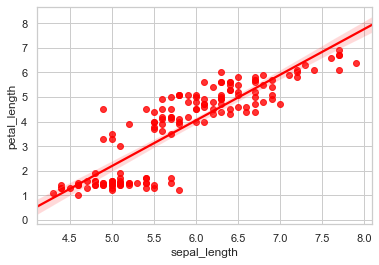

In [39]:
#color
sns.regplot(x=df["sepal_length"], y=df["petal_length"], color='red') #전부다 빨간색



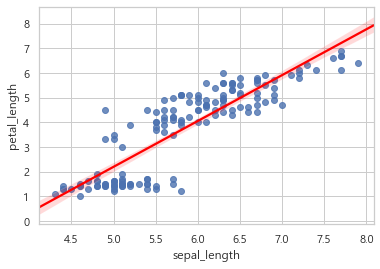

In [64]:
sns.regplot(x=df["sepal_length"], y=df["petal_length"], line_kws={'color': 'red'})
#선의 속성만 바꾸려면 위와같이 실행.


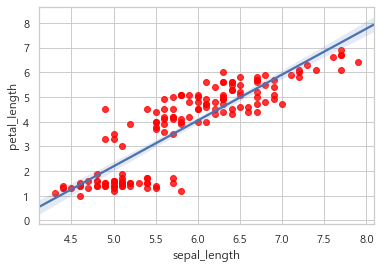

In [65]:
sns.regplot(x=df["sepal_length"], y=df["petal_length"], scatter_kws={'color': 'red'})
#점의 속성만 바꾸려면 위와같이 실행.

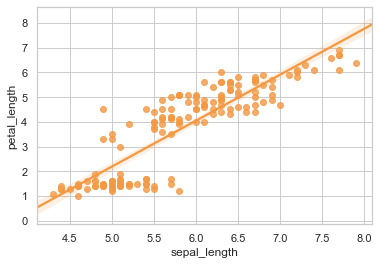

In [42]:
sns.regplot(x=df["sepal_length"], y=df["petal_length"], color='#f49842')
#그밖에 색상에 대해 알고싶으면 구글에서 color picker 검색

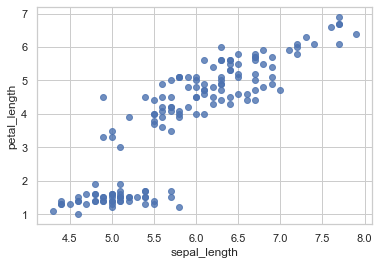

In [43]:
#line delete
sns.regplot(x=df["sepal_length"], y=df["petal_length"], fit_reg=False) #회귀직선 제거
# == sns.relplot(x="sepal_length", y="petal_length", data=df)
# != sns.relplot(x=df["sepal_length"], y=df["petal_length"] )
#Graph Properties

(0, 8)

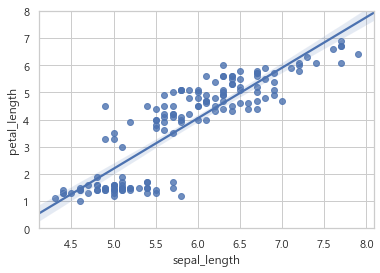

In [67]:
#boundary
#fig, ax = sns.regplot(x=df["sepal_length"], y=df["petal_length"]) 얘는 안됨.
ax = sns.regplot(x=df["sepal_length"], y=df["petal_length"])
ax.set_ylim([0, 8]) #한계를 정함. 이때 그래프가 창에 띄워져있어야 실행됨.


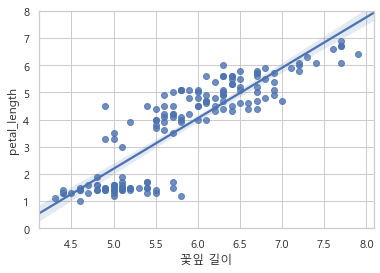

In [68]:
#names
ax.set_xlabel('Sepal Length') #그림이 켜져있는 상태에서 실행
ax.figure  # 그림을 현재 셀에서 다시 보여준다. (파이참에서는 의미없는듯?)
ax.set_xlabel('꽃잎 길이') #한글을 사용하면 글자가 꺠짐.
ax.figure   # 그림을 현재 셀에서 다시 보여준다.

Text(0, 0.5, '꽃받침 길이')

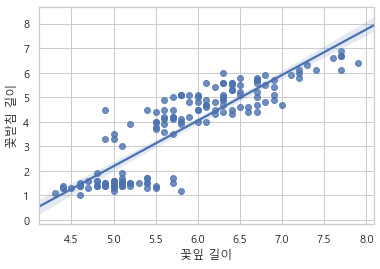

In [46]:
#fonts 
plt.rc('font', family='Malgun Gothic') #말건고딬
ax = sns.regplot(x=df["sepal_length"], y=df["petal_length"])
ax.set_xlabel('꽃잎 길이')
ax.set_ylabel('꽃받침 길이')

In [51]:
#minus problem 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) 
#만약 한글처럼 차트내에서 마이너스가 깨지면 위를 입력하면 해결.


In [50]:
#fonts names
from matplotlib.font_manager import fontManager
for font in fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name)

Century Gothic
Malgun Gothic
Malgun Gothic
Showcard Gothic
Franklin Gothic Demi
Malgun Gothic
MS Gothic
Yu Gothic
HYGothic-Medium
Century Gothic
Franklin Gothic Heavy
Century Gothic
Yu Gothic
Copperplate Gothic Light
MJemokGothic
Franklin Gothic Book
Franklin Gothic Heavy
Copperplate Gothic Bold
Franklin Gothic Demi
Franklin Gothic Book
Franklin Gothic Medium Cond
Franklin Gothic Medium
Franklin Gothic Medium
Yu Gothic
Century Gothic
Franklin Gothic Demi Cond
Yu Gothic


### 4. pairplot 

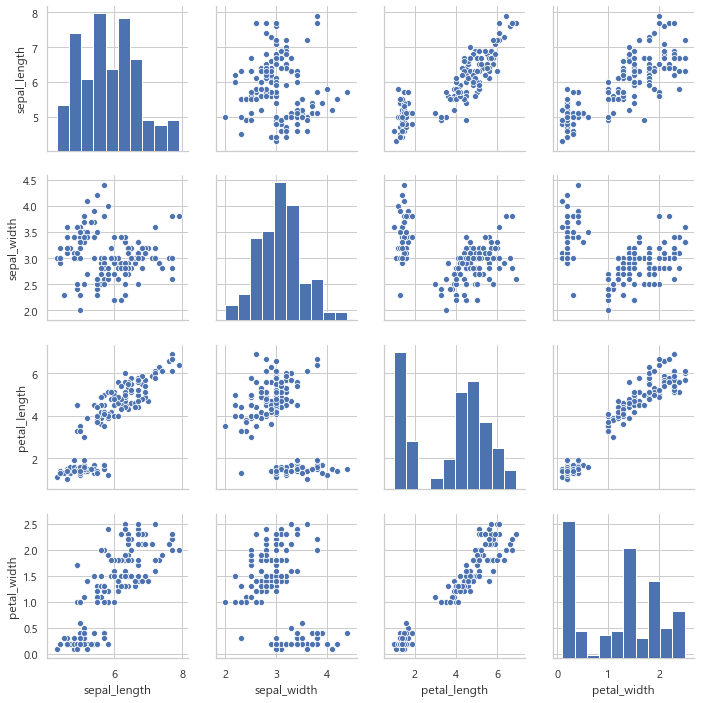

In [52]:
iris = sns.load_dataset("iris")
sns.pairplot(iris) #변수별 산포도를 그려줌. 대각선에는 자신의 히스토그램


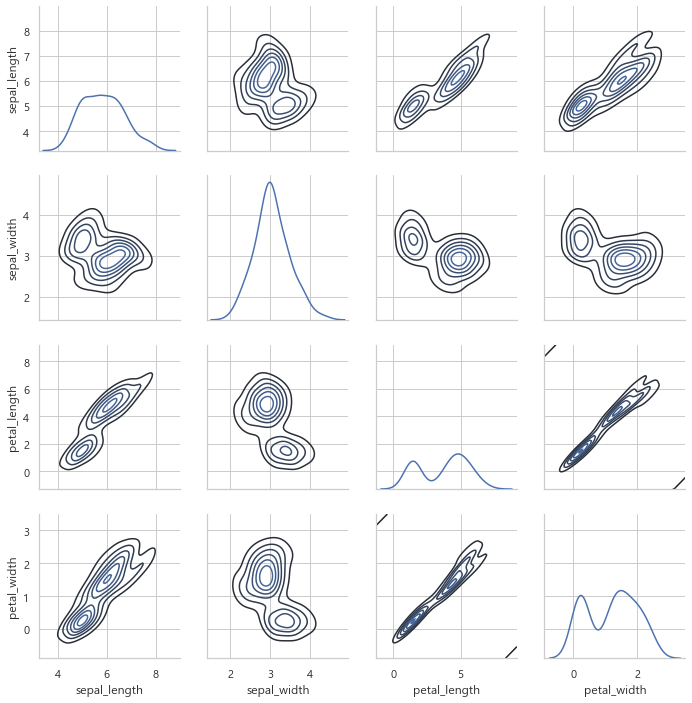

In [53]:
g = sns.PairGrid(iris)#밑바탕 출력후,
g.map_diag(sns.kdeplot) #kernel density estimation를 통해 바꿈. (대각만 적용)
g.map_offdiag(sns.kdeplot, n_levels=6); #(비대각쪽 다적용) 추측: n_levels는 #비대각원소의 수 (대칭이니까 한쪽만) 인듯.
#이로써, kdeplot 도 그려볼 수 있음.

### 5. distplot(Histogram)

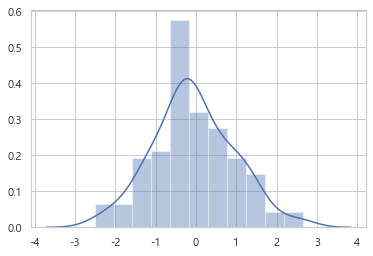

In [54]:
#visualizing the distribution of a dataset
x=np.random.normal(size=100) #정규분포(mu,sigma,n)  <- 차이점 기억!
#y=np.random.randn(2,3) # 평균이 0, 표준편차가 1인 2*3 배열의 정규난수를 생성함. 다변량과 관련은 없음.
#다변량함수는 np.random.multivariate_normal 함수임.
sns.distplot(x);
#seaborn의 dist는 matplot의 hist를 기반으로하고 있다.
#x축은 변수 - 여기서는 랜덤으로 부여한 숫자 / y축은 커널밀도추정을 거친 정규화된 수치
#커널밀도추정 - Kernel Density Estimation : 히스토그램 구한후 정규화해서 확률밀도함수로 사용한것


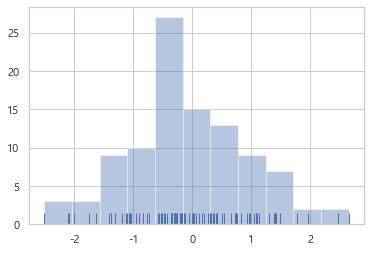

In [55]:
#histograms
sns.distplot(x,kde=False,rug=True);
#kde=False하면 y축에 해당분포에대한 절대치(개수)가 출력 True면, 정규화된 수치가 나옴.
#rug=True로 할 시, 선분으로 해당 데이터의 위치가 표시.


### 6. heatmap

In [58]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers") #회전(재정렬)
#month를 y축, year을 x축, passengers를 데이터로

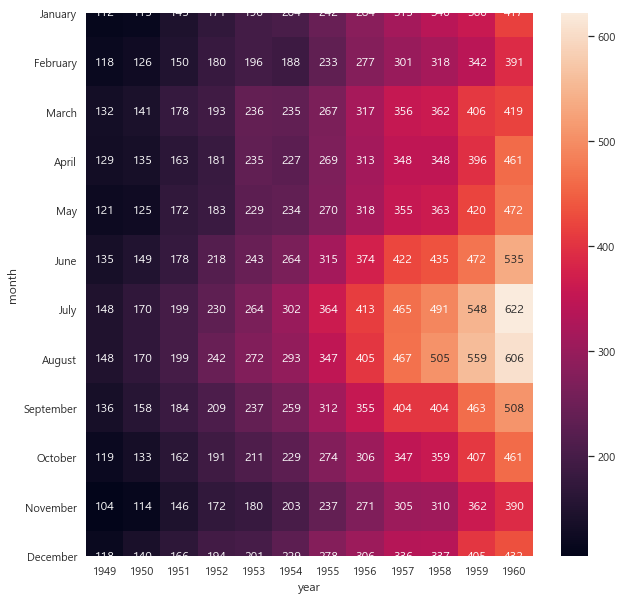

In [57]:
plt.figure(figsize=(10, 10)) #크기를 먼저 할당해주고,
ax = sns.heatmap(flights, annot=True, fmt="d") #데이터 고대로 색깔만 입혀서 출력해줌.
#위의 옵션에 대해서는 추후에 알아보기.


### 7. joinplot

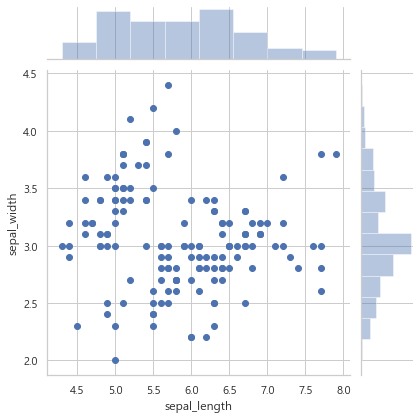

In [59]:
sns.jointplot(x='sepal_length',y='sepal_width',data=iris)
#두 데이터가 연속형 numeric이면, joint pdf를 보일수 있음

## 2. Sources
---

- [1](https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/ )<br>
- [2](https://nonmeyet.tistory.com/entry/Python-seaborn%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-1 ) <br>
- [3](http://doc.mindscale.kr/km/python/11.html)